# Credit Card Fraud Detection
Machine Learning Engineer Capstone Project
By Patrick Wellins


**Project Overview**

Over the years, billions of dollars have been lost to fraudulent credit card charges. In an article by the Economist (2014), it is shown that in 2012 the total amount of fraudulent credit card charges worldwide amounted to over 10 billion dollars. Technology to detect fraudulent charges is currently employed, and many startup technology companies are using machine learning for fraud prevention (CBINSIGHTS 2017). One area of machine learning called supervised learning involves learning patterns that exist in labeled datasets. A model that learns patterns in labeled data can make predictions on unlabeled data; these predictions could be a class that a variable belongs to or real-valued numbers.  
This report will describe the process of building a supervised learning model based on a Kaggle dataset (Dal Pozzolo et al. 2015) that contains 284,807 credit card charges that are labeled as genuine or fraudulent. The charges occurred over a two-day period in 2013 and were made by European cardholders. There is a total of 31 columns in the dataset that represent different variables. The variable ‘Class’ is the target variable that is to be predicted by the supervised learning model. The values that the variable ‘Class’ take on are either 0 or 1. Class 1 represents fraudulent charges, and Class 0 represents genuine charges.  Out of the 284,807 charges, 492 (0.17%) are fraudulent. In this report, a step by step process will be demonstrated to show the development of a supervised learning model that makes predictions that a given charge is genuine or fraudulent. 

The objective is to build a classification model that achieves a F1 score of >= 0.90 on the test set of credit card charges and exceeds all set benchmark scores. For this to be accomplished, the model will have to learn key differences between the independent variables of genuine and fraudulent charges. Once these differences have been learned, the model will make predictions on the test set. It is important to note that the test set consists of data points that the model has not been trained on. The goal is that the model generalizes well and makes class predictions on the test set that match the actual class label. Before model development, the data will be explored statistically and visually. Some statistical and visual techniques that will be employed include tests for normality of data, outlier detection, and visualizing the patterns of the two classes in scatter plots. Multiple models will be trained, and the strongest performing model will be optimized. The performance of the optimized model will be compared to benchmark performance metrics which include the accuracy of a naïve prediction model and an array of metrics that a logistic regression model attains on the test set. The F1 score of the final model will provide concrete evidence of model performance. A conclusion will be made about the quality of the model that is based on prediction performance on the test set. 
The programming language used to solve this problem is Python. The libraries used for this project are pandas, random, numpy, sklearn, seaborn, matplotlib.pyplot,IPython.display, scipy, statistics, warnings, mpl_toolkits.mplot3d.

**Problem Statement**

The problem to be solved is classifying fraudulent and genuine credit card transactions in the test set with a high-level of performance defined by a F1 score of >= 0.9. To achieve the goal of a F1score >= 0.9 several steps will need to be carried out. The first step is to understand the data statistically and visually. Statistical analysis of the data will be informative regarding how the data should be preprocessed. Twenty-eight of the feature variables in this dataset are already standardized. Standardized variables allow for model parameters to be updated uniformly while the gradient descent algorithm is being carried out. It is possible that only a subset of the 30 feature variables will be predictive. To select the most predictive variables, the feature importance method that corresponds to a random forest classifier will be employed to choose the most predictive feature variables. Reducing the number of feature variables will allow for faster training time. Additionally, redundant or non-predictive variables do not contribute to higher model performance. After obtaining the most predictive feature variables, logistic regression, support vector machine, and decision tree models will be trained. These trained models will then make predictions on the test set of charges, and four metrics will be recorded. These metrics include accuracy, precision, recall and F1 score. The model with the highest F1 score will be further refined with hyper-parameter optimization. To choose the best hyper-parameters for the selected model, k-fold cross-validation and grid search will be employed. The process of cross-validation and grid search will test which combination of hyper-parameters have the highest validation score. This set of hyper-parameters will be chosen for the model, and the model will make predictions on the test set. The test set performance metrics will be provided and will be compared to the objective of a F1 score >= 0.90 and benchmarks. 

**Metrics**

Four metrics will be used to evaluate the performance of all models built for classifying credit card charges. These four metrics include accuracy, precision, recall, and F1. A description of each of these metrics is provided along with how each metric integrates into the problem of classifying charges. The preeminent metric is the F1 score; this metric is the most effective for conveying model performance results due to the imbalance of the data set.
Accuracy is defined by #True Positives + #True Negatives / #False Positives + # False Negatives + #True Positives + #True Negatives. Accuracy is the percentage of predictions that match the actual class label. In the context of this problem, accuracy is not the best metric to evaluate model performance. Predicting every transaction as genuine will return an accuracy score of ~ 0.99827, this level of accuracy will be used as a benchmark for model performance. The high score of the naïve prediction model displays the ease of generating a high accuracy score when a dataset is highly imbalanced.
Precision is defined by #True Positives / #True Positives + #False Positives. Precision measures how well the model avoids making false positive predictions. A score of 1.0 indicates that of all positive predictions made there are no false positives generated. In the context of this problem, precision is important for the following reason; a false positive has the potential to stop a person from making a legitimate purchase.
Recall is defined by #True Positives / #True Positives + #False Negatives. The denominator of this metric is equivalent to the total true positives in the dataset. A recall rate of 1.0 indicates that the model correctly identified every true positive in the dataset. The higher the recall is, the more fraudulent charges that have been correctly identified.
F1 is defined by 2 x ((Precision x Recall) / (Precision + Recall)). The F1 score is the harmonic mean of Precision and Recall. The F1 score is similar to the average of precision and recall. The F1 score will be the preeminent metric for evaluating model performance, given that F1 measures a combination precision and recall. The F1 score is a well-rounded evaluation metric for model performance.

In [1]:
# Import Libraries
import pandas as pd
import random as random
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score
from time import time
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from IPython.display import display # Allows the use of display() for DataFrames
import timer as t

# Load data frame with features and target
df = pd.read_csv('creditcard.csv')

# Create target variable
target = df['Class']

# Create feature dataframe
features = df.drop(['Class'], axis = 1)

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


**Basic Statistics for all variables**

In [2]:
# Get basic statistics of the variables
display(df.describe())
df['V14'].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


count    2.848070e+05
mean     1.479045e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

**Data Exploration**

The dataset contains transactions made by European cardholders over a two-day period during September 2013. The dataset contains information for 284,807 charges, of the 284,807 charges 492 are fraudulent. The dataset is highly unbalanced; class 1 accounts for 0.172% of all transactions.

There is a total of 30 feature variables, the 28 variables beginning with 'V' are 28 principal components of the original data. The labels for the original 28 features in the data have been removed for confidentiality reasons. In addition to the 28 principal component variables, there are the variables 'Time' and 'Amount.' The unit of the 'Time' variable is in seconds. The currency unit is not specified for 'Amount.'

The variable ‘Amount’ corresponds to the amount of the transaction. The average of 'Amount' is approximately 88.35. The 'Amount' variable is not normally distributed, the mean value of 88.35 is distant from the median value of 22. Figure 4. is a QQ-plot that illustrates that 'Amount' is not normally distributed; if the values of 'Amount' were normally distributed the blue data points would track the red line in the QQ-plot. The 'Amount' variable has been tested for normality with the Shapiro-Wilk test; the corresponding p-value is 0. When testing for normality with the Shapiro-Wilk test, generally an alpha level of 0.05 is selected, and if the p-value is less than the alpha value there is a failure to accept the null hypothesis of normality. In this case, the p-value is 0, indicating a failure to accept that the 'Amount' variable is normally distributed.

The transactions took place over a 2-day period or over 172,792 seconds. Dividing 172,792 seconds by 3,600 seconds returns 48 hours. To get a better understanding of time, the seconds were converted to hours and the hours have been modularized so after the 24th hour the hours go to 0, this can be seen in figures 7 - 9. The hour 16 had the most transactions over the two-day period. Approximately 67 percent of the charges occurred during the second halves of each day.

The variables 'V1', 'V2', ... , 'V28' are principal components of the original feature variables. It is unfortunate that there are no original names for these features. However, insights can still be gained from these unlabeled variables regarding the difference between fraudulent and genuine charges. The variables 'V1', 'V2', ... , 'V28' and not normally distributed and contain many outliers. Non-normality of these variables is shown by the Shapiro-Wilk test, p-values for the Shapiro-Wilk test can be seen in Table 1. There are many outliers in the feature variables, outliers can be seen in Figure 2. The Shapiro-Wilk test has been used to check if the all the feature variables are normally distributed. The p-value for each feature value is zero or near zero, indicating non-normal distributions for every feature variable. 

** Data Samples**
Below are two sampled transactions in the dataset. One transaction is a genuine charges and the other is a fraudulent charge.

In [3]:
# Set random seed and initialize variables for samples
random.seed(10)
sample_genuine = 0
sample_fraudulent = 0
# Create a while loop that terminates once a genuine charge has been randomly selected
# and assign the vector to sample_genuine
while True:
    r = random.choice(np.arange(0,284807))
    if df['Class'][r] == 0:
        sample_genuine = df.iloc[r]
        break
# Create a while loop that terminates once a fraudulent charge has been randomly selected
# and assign the vector to sample_fraudulent
while True:
    r = random.choice(np.arange(284807))
    if df['Class'][r] == 1:
        sample_fraudulent = df.iloc[r]
        break

In [4]:
# Print the first 10 variable values for the two samples
print('Sample Genuine Charge')
display(sample_genuine[:10])
print('')
print('Sample Fraudulent Charge')
display(sample_fraudulent[:10])

Sample Genuine Charge


Time    28418.000000
V1          1.561486
V2         -0.948481
V3          0.240888
V4         -1.440219
V5         -1.308782
V6         -0.748813
V7         -0.925117
V8         -0.218023
V9         -1.809147
Name: 17083, dtype: float64


Sample Fraudulent Charge


Time    41991.000000
V1         -4.566342
V2          3.353451
V3         -4.572028
V4          3.616119
V5         -2.493138
V6         -1.090000
V7         -5.551433
V8          0.447783
V9         -2.424414
Name: 44556, dtype: float64

**Shapiro-Wilk test for feature variables**

In [5]:
# Import libray for Shapiro-Wilk test
from scipy import stats
# Use Shapiro-Wilk test to determine if variables are normally distributed
for i in features.columns:
    print(i + ':',round(stats.shapiro(features[i][:5000])[1],3),',', end = ' ')

Time: 0.0 , V1: 0.0 , V2: 0.0 , V3: 0.0 , V4: 0.0 , V5: 0.0 , V6: 0.0 , V7: 0.0 , V8: 0.0 , V9: 0.0 , V10: 0.0 , V11: 0.0 , V12: 0.0 , V13: 0.0 , V14: 0.0 , V15: 0.0 , V16: 0.0 , V17: 0.0 , V18: 0.0 , V19: 0.0 , V20: 0.0 , V21: 0.0 , V22: 0.0 , V23: 0.0 , V24: 0.0 , V25: 0.0 , V26: 0.0 , V27: 0.0 , V28: 0.0 , Amount: 0.0 , 

**Comparing Average 'Amount' for fraudulent and genuine charges**

In [6]:
# Print out statistics for Amount variable for class 1 and 0

print("Average Class 1 'Amount': " + str(np.mean(df[df['Class'] == 1]['Amount'])))
print("The max 'Amount' for Class 1 is: " + str(max(df[df['Class'] == 1]['Amount'])))
print(' ')
print("Average Class 0 'Amount': " + str(np.mean(df[df['Class']== 0]['Amount'])))
print("The max 'Amount' for Class 0 is: " + str(max(df[df['Class']== 0]['Amount'])))

Average Class 1 'Amount': 122.21132113821133
The max 'Amount' for Class 1 is: 2125.87
 
Average Class 0 'Amount': 88.29102242225574
The max 'Amount' for Class 0 is: 25691.16


**Percentage of fraudulent charges in the dataset**


In [7]:
# Percentange of frauds in entire data set
df[df['Class'] == 1]
print(len(df[df['Class'] == 1]) / len(df))

0.001727485630620034


## Exploratory Visualization

The Figures 1. – 12., show key characteristics of the dataset. Histograms, QQ-plots, scatter plots, and distributions show the structure of the data and the differentiation of fraudulent and genuine charges.

**Distribution of the 'V14' variable**

The 'V14' variable is extremely left-skewed. Most of the values are clustered around the mean which is near zero. However, there exist values that are extremely distant from the mean value of 0. Figure 2 highlights some of these extreme outliers. More detailed visualizations such as Figure 3 will show whether these extreme values are indicative of fraudulent charges.

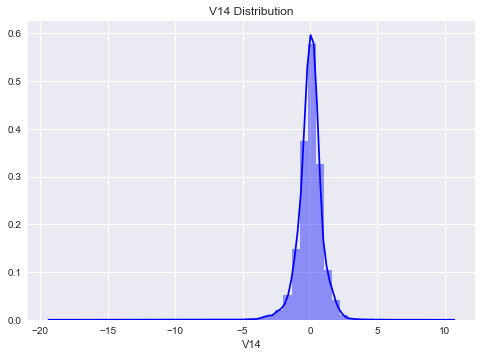

In [252]:
# Plot the distribution of the 'V14' Variable
sns.distplot(features['V14'], color = 'blue')
plt.legend()
plt.xlabel('V14')
plt.title('V14 Distribution')
plt.show()

**Visual of extreme outliers in 'V14'**

The vertical orange bar is placed at three standard deviations below the mean value of 'V14'. The vertical red bar is placed at the minimum value of 'V14', this value is roughly -19.2 which is considered an extreme outlier. 

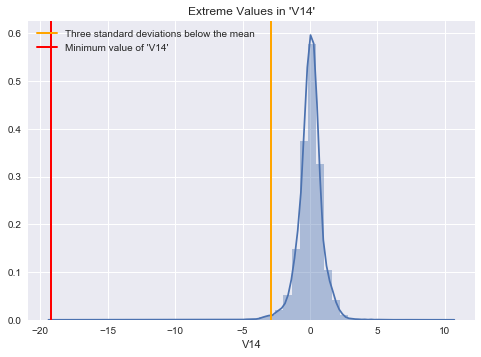

In [9]:
# Plot distribution of V14 and show outlier values
sns.distplot(df['V14'])
plt.title("Extreme Values in 'V14'")
plt.axvline(np.mean(df['V14']) -3 * np.std(df['V14']), color='orange', linewidth=2, label = 'Three standard deviations below the mean')
plt.axvline(min(df['V14']), color = 'red', linewidth=2, label = "Minimum value of 'V14'")
plt.legend()
plt.show()

**Outliers and Missing Values**

There are many outliers in the feature variables. In this case, the outliers are helpful for classifying fraudulent and genuine charges. Figure 3 illustrates this point, the distribution for the variable 'V14' is plotted for Class 1 and Class 0. The extreme values that Class 1 take relative to Class 0 are beneficial for the task of classification. Gaussian mixture models for clustering operate on the principle that separate classes come from separate distributions. When clustering with a Gaussian Mixture model, each data point has a probability of belonging to one of k distributions, and it is assigned to one of the k distributions that it has the highest probability of belonging to. The distributions of the 'V14' variable for the separate classes are very different. The distribution of the 'V14' variable for fraudulent charges has a much higher variance than the distribution of 'V14' for genuine charges. Table 4. provides the mean and variance values for the ‘V14’ variable for fraudulent and genuine charges.

**Distribution of 'V14' Variable for Class 1 and Class 0**

The distributions of the 'V14' variable for the separate classes are very different. The distribution of the 'V14' variable for fraudulent charges has a much higher variance than the distribtion of 'V14' for genuine charges. Below are the mean and variance values for the 'V14' variable for fraudulent and genuine charges.

In [10]:
# Print mean and variance of 'V14' for fraudulent and genuine charges

print("The mean of 'V14' for fraudulent charges: " + str(round(np.mean(df[df['Class'] == 1]['V14']),2)))
print("The variance of 'V14' for fraudulent charges: " + str(round(np.var(df[df['Class'] == 1]['V14']),2)))
print(' ')
print("The mean of 'V14' for genuine charges: " + str(round(np.mean(df[df['Class'] == 0]['V14']),2)))
print("The variance of 'V14' for genuine charges: " + str(round(np.var(df[df['Class'] == 0]['V14']),2)))

The mean of 'V14' for fraudulent charges: -6.97
The variance of 'V14' for fraudulent charges: 18.27
 
The mean of 'V14' for genuine charges: 0.01
The variance of 'V14' for genuine charges: 0.8


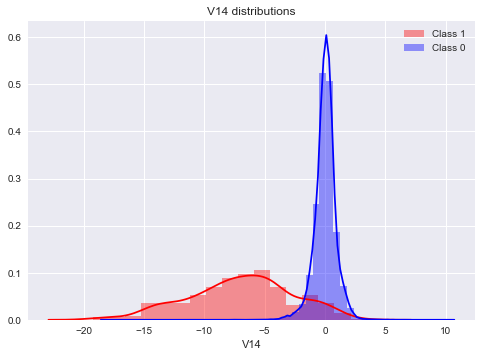

In [11]:
# Plot the distribution of V14 for both class 1 and class 0
sns.distplot(df[df['Class'] == 1]['V14'], label = 'Class 1', color = 'red')
sns.distplot(df[df['Class'] == 0]['V14'], label = 'Class 0', color = 'blue')
#sns.distplot(df['V14'], label = 'All Charges',  color = 'green')
plt.legend()
plt.xlabel('V14')
plt.title('V14 distributions')
plt.show()

**The QQ-plot below illustrates the non-normal distribution of the 'Amount' variable.**

Data that is normally distributed would closely track the red line in the QQ-plot. The values for 'Amount' are extremely far from this line.

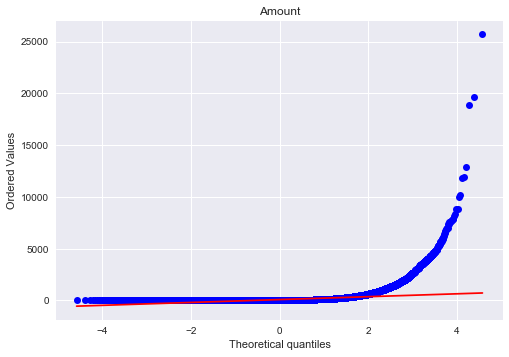

In [12]:
import scipy.stats as scs
# Create a qq-plot for the 'Amount' variable
scs.probplot(features['Amount'], dist="norm", plot=plt)
plt.title('Amount')
plt.show()

## Scatter Plots of Feature Pairs

Figure 5 shows a scatter plot that has a x-coordinate of 'V12' and a y-coordinate of 'V17'. Genuine charges are colored blue and fraudulent charges are colored red. Figure 6 is a scatter plot for the variables 'V16' and 'V17'. The clusters of class groups are highly visible in the scatter plots. This clustering provides intuition for how a model might classify fraudulent and genuine charges. 

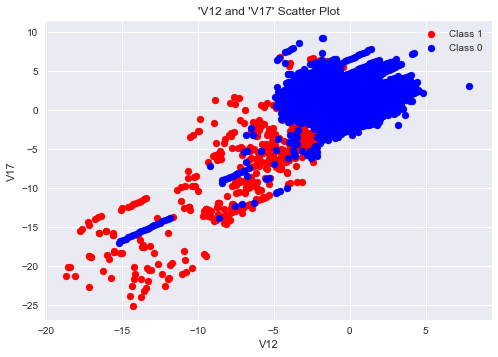

In [13]:
# Plot Scatter plots of V12, V16

plt.scatter(df[df['Class'] == 1]['V12'],df[df['Class'] == 1]['V17'], label = 'Class 1', color = 'red')
plt.scatter(df[df['Class'] == 0]['V12'],df[df['Class'] == 0]['V17'], label = 'Class 0', color = 'blue')
plt.legend()
plt.title("'V12 and 'V17' Scatter Plot")
plt.xlabel('V12')
plt.ylabel('V17')
plt.show()

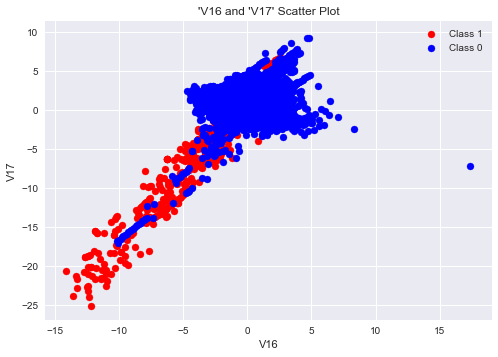

In [14]:
# Plot Scatter plots of V12, V16

plt.scatter(df[df['Class'] == 1]['V16'],df[df['Class'] == 1]['V17'], label = 'Class 1', color = 'red')
plt.scatter(df[df['Class'] == 0]['V16'],df[df['Class'] == 0]['V17'], label = 'Class 0', color = 'blue')
plt.legend()
plt.title("'V16 and 'V17' Scatter Plot")
plt.xlabel('V16')
plt.ylabel('V17')
plt.show()

## Times of Purchases

Figures 7 - 9 show the frequency of charges through bar charts and a histogram. Sixty-seven percent of the charges occur in the second half of the day. The sixteenth hour has the highest frequency of charges. Below is a statistical summary of hours on a twenty-four-hour interval.

In [15]:
# A block of code to find out the percentage of transactions that took place in the second half
# of the day
from statistics import mode
all_times = pd.Series(t.get_all_times(df))
print('Statistics For Time Variable \n')
print(all_times.describe())
print(' ')
print('Hour of the day with the most transactions')
print(mode(all_times))

second_half = 0
for time in all_times:
    if time > 11:
        second_half += 1
        
print(' ')
print(str(round( 100 * np.sum(second_half) / len(all_times))) + ' percent on the transactions took place in the second half of the day.' )
        

Statistics For Time Variable 

count    140022.000000
mean         13.869342
std           5.743435
min           0.000000
25%          10.000000
50%          14.000000
75%          18.000000
max          23.000000
dtype: float64
 
Hour of the day with the most transactions
16.0
 
66.0 percent on the transactions took place in the second half of the day.


** Statistics for 'Time' variable**

- 66 % of the transactions took play in the first half of the day.
- The 16th hour has the most transactions.

**Histogram of Hours**

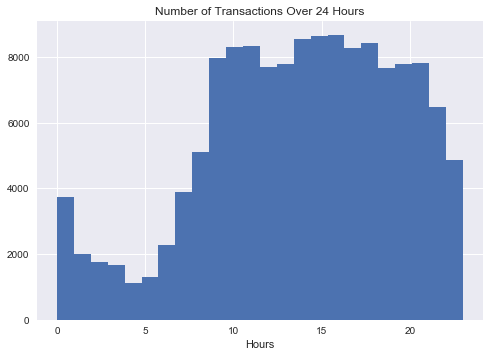

In [16]:
# A hsitogram of hours

plt.hist(t.get_all_times(df), bins = 24)
plt.title('Number of Transactions Over 24 Hours')
plt.xlabel('Hours')
plt.show()

**Frequencies of hours for both fraudulent and genuine charges**

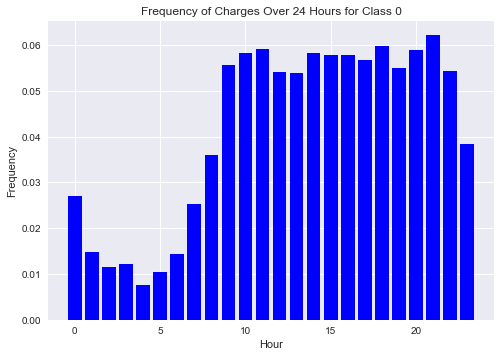

In [17]:
# Show the probabilities of a transaction occurring at a given hour 
# for non-fraudulent transactions
a , b = t.get_class0_times(df)
plt.bar(a, b, color = 'b')
plt.title('Frequency of Charges Over 24 Hours for Class 0')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.show()


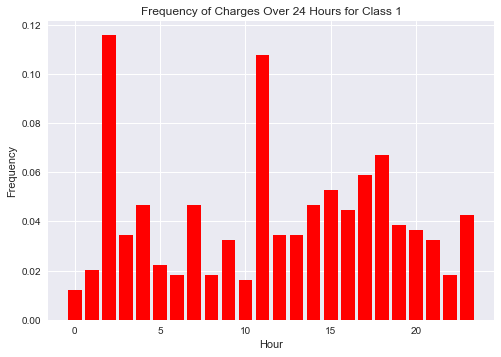

In [18]:
# Show the probabilities of a transaction occurring at a given hour 
# for fraudulent transactions
a, b = t.get_class1_times(df)
plt.bar(a,b, color = 'r')
plt.title('Frequency of Charges Over 24 Hours for Class 1')
plt.ylabel('Frequency')
plt.xlabel('Hour')
plt.show()

In [21]:
# Print the frequency of leading digit 9 for both classes
print('Frequency of 1st digit having value 9 in Amount for Class == 1: ' + str(a[8]))
print('Frequency of 1st digit having value 9 in Amount for Class == 0: ' + str(b[8]))

Frequency of 1st digit having value 9 in Amount for Class == 1: 0.0966981132075
Frequency of 1st digit having value 9 in Amount for Class == 0: 0.0555761102329


## Algorithms and Techniques



The decision tree classifier works by passing data through a series of nodes that ask questions about the data and depending on the answers at various nodes; the data will be placed in a leaf that represents a class label. For example, if the task is to classify animals, a tree could be constructed that has a node >= 15 feet tall, if the animal is >= 15 feet tall it will end up in a leaf of the tree that labels the animal 'Giraffe.' Many more nodes could be specified to split the animals into classes. The nodes are constructed to maximize information gain between the parent node and child nodes. Information gain measures the difference in impurity between the parent node and the child nodes. In the case of two classes, the impurity is highest when the class proportions of data points are both 0.50 at a given node. Impurity is lowest when a node only contains data points that are from one class. For this problem specifically, the goal is to train a decision tree that can correctly classify charges in the test set. When initially training the model, the hyper-parameters for the Decision Tree classifier will not be modified from the default settings set by scikit-learn. Some of the hyper-parameters of a decision tree classifier include maximum depth and minimum samples per leaf. Higher levels of maximum depth can contribute to over fit or high variance models, lower values for minimum samples per leaf can also contribute to over fit models. The decision tree classifier is a non-parametric model and will be helpful in observing the difference between performance between parametric and non-parametric models.

The Support Vector Machine classifier separates data points in different classes with a linear separator, such that the margin between classes is maximized. Support vector machines can also separate classes that are not linearly separable in their current dimension. This is done by mapping the feature values to a higher dimension then separating the classes with a hyper-plane. Mapping feature variables to higher dimensions where they can be linearly separated is called the kernel trick. Using a SVM for this problem will be useful if the data is not linearly separable in its current dimension. Maximizing the margin of the hyperplane that separates data points is a key advantage that a SVM has over logistic regression. Maximizing the distance between the different classes can potentially make a model that generalizes better for new data. The initial SVM that is trained will have hyper-parameters that are at default settings. The kernel of the SVM is set as 'rbf,' this setting allows for non-linear separations through the kernel trick. The SVM may exceed the performance of logistic regression because of the position of the hyper-plane being optimized and the capability to separate data that is not linearly separable.

The objective of the logistic regression model is to linearly separate classes of data points. The parameters of the model are derived from the gradient descent algorithm. The gradient descent algorithm updates parameter weights to minimize the error function.  The weights are iteratively updated by subtracting the gradient of the error function with respect to the weights from the current weight values, additionally, a learning rate alpha multiplies the gradient to control the size of the steps when reducing the error function. The relative simplicity of logistic regression makes it a good benchmark model for a more sophisticated model such as a SVM. If the SVM exceeds the performance of the logistic regression model, this could indicate that there are non-linear boundaries between classes of data points. The logistic regression model will have default hyper-parameter values set by scikit-learn. The parameter 'C' controls the penalty for the magnitude of weights, higher values of C penalize the magnitude of parameters less than low values of C. The value of C is tuned to control the complexity of the logistic regression model.

Principal Component Analysis is employed to reduce the dimensionality of data while losing as little information about the data as possible. The process of deriving principal components is carried out in the following way. A covariance matrix is calculated from the feature variable matrix, eigenvalues and eigenvectors are then derived from the covariance matrix. Each eigenvector has a corresponding eigenvalue and eigenvectors are ranked according to the magnitude of their eigenvalues. The rank of eigenvectors is based on the size of their eigenvalues, higher eigenvalues correspond to how much variability in the data each eigenvector explains. The eigenvectors form an orthogonal set of vectors which represent the principal components. To find out where a data point lies on a principal component the following is carried out. A data point such as [x, y, z] is mapped to a position on a principle component by the average value of each variable being subtracted from the values in the vector e.g. [x - mean(X), y - mean(Y), z – mean(Z)] then the dot product of this vector and a principal component calculated. This results in a scalar value on a principal component axis. Principal component analysis will be used in this to reduce the dimension of the feature variables to allow for better visualization of the structure in the data. Here is a link that has a nice visual presentation of principal component analysis. http://setosa.io/ev/principal-component-analysis/ 

## Benchmark

The benchmarks consist of a naive prediction accuracy score and the accuracy, precision, recall and F1 score of a logistic regression model. The accuracy attained by the naive prediction of assuming all charges are genuine is (284807 - 492) / 284803, this value is roughly 0.99827. Since the logistic regression model is a relatively simple classification model, the metrics that the logistic regression model generates on the test set will be appropriate benchmarks for a more sophisticated model such as a SVM to be measured against.


## Data Preprocessing


To extract the features that are most predictive for classifying a charge as fraudulent or not, the feature_importances method of a random forest classifier will be employed. This will reduce the number of features in model training and will reduce training time. Feature importance corresponds to how much splitting on a feature in a forest of trees decreases impurity. The feature that corresponds to the greatest decrease in impurity on average is the most important feature.

After training a Random Forest Classifier with 100 trees, the most predictive features have been returned with the feature_importances method. The six most predictive feature variables consist of 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'. These six features will be used to train the classification models.  Figure 10. displays a bar chart that shows feature importance. As seen in Figure 10., ‘V12’ is the most important feature as it has the highest value.
The feature variables 'V10', 'V11', 'V12', 'V14', 'V16', 'V17' are already standardized, so it is unnecessary to manipulate these feature variables. The variables 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'  all have a mean value of zero or near zero which makes standardizing unnecessary. To illustrate standardization more concretely below is an example of pseudocode that standardizes a hypothetical variable X.

**Splitting Data into training and testing sets**

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 227845 samples.
Testing set has 56962 samples.


**Training a Random Forest Classifier**
100 trees are created to make the forest, the most predictive features are selected with the feature_importances method. 

In [23]:
# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

feature_labels = features.columns
# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1)
model = model.fit(X_train, y_train)
importances = model.feature_importances_



**Bar plot of feature importances**
The the six most predictive feature variables consist of 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'. These six features will be used to train the the classification models.

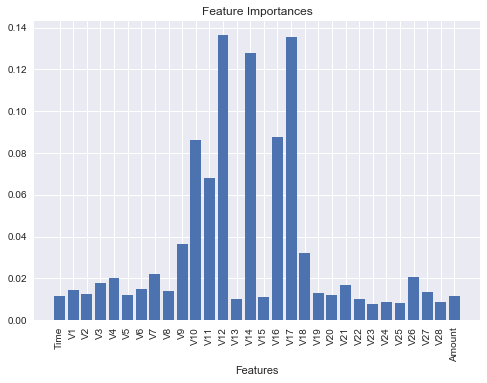

In [24]:
data = {}
for i in range(len(feature_labels)):
    data[feature_labels[i]] = importances[i]
    
plt.bar(range(len(data)), data.values(), align='center')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.xticks(range(len(data)), list(data.keys()), rotation = 90)
plt.show()

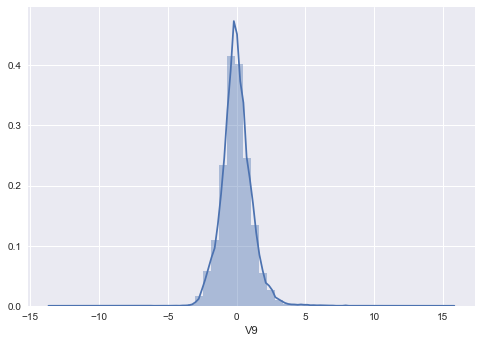

In [25]:
# plot the distribution of 'V9' to show standardization
sns.distplot(df['V9'])
plt.show()

In [2]:
# Create features dataframe dropping the most predictive features
features_reduced = pd.DataFrame(features,columns =['V10', 'V11', 'V12', 'V14', 'V16', 'V17'])

In [18]:
features_reduced.head()

,V10,V11,V12,V14,V16,V17
0,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971
1,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805
2,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969
3,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093
4,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033


## Implementation



The feature and target variables have been split into training and testing sets with the “train_test_split” function. The testing set is 20 % of the data; the test set is not used for model training. A SVM classifier, logistic regression, and decision tree classifier were instantiated and fit to the training set. The parameters of the SVM and logistic regression models are learned through the gradient descent algorithm during training. The gradient descent algorithm adjusts the parameters to minimize the error function of these parameterized models. The decision tree classifier turns into a structure of nodes and leaves, what leaf a data point falls into depends on the values of the feature variables. Maximizing information gain is what determines splits in the tree. After model training, the models made predictions on the test set.

In [3]:
TP = np.sum(target) # There are 492 Fraudulent Charges labeled 1
# In this case there are zero false positives because the naive prediction is that 
# all of the charges are of class 0 or legitimate charges
FP = 0
# Subtract the number of class 1 entries from all entries
# to obtain the number of true negatives
TN = len(df) - TP 
# Since the naive predictin is that everything is of class zero
# the number of false negatives will be the number of true positives
FN = TP 
# Accuracy, recall and precision variables
accuracy = (TN) / (TP + TN + FP + FN)
# Print the benchmark accuracy 
print("Naive Predictor Accuracy: " + str(accuracy) )

Naive Predictor Accuracy: 0.9965509868594001


In [4]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features_scaled' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reduced, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 227845 samples.
Testing set has 56962 samples.


In [9]:
# Import necessary libraries
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

clf_Logistic = LogisticRegression(random_state = 5)
clf_SVM = svm.SVC(random_state = 5)
clf_DecisionTree = tree.DecisionTreeClassifier()



clf_Logistic.fit(X_train,y_train)
clf_SVM.fit(X_train,y_train)
clf_DecisionTree.fit(X_train,y_train)


Logistic_predictions = clf_Logistic.predict(X_test)
SVM_predictions = clf_SVM.predict(X_test)
DecisionTree_predictions = clf_DecisionTree.predict(X_test)

In [256]:
# F1 scores for all models
f1_Logistic = f1_score(y_test,Logistic_predictions)
f1_SVM = f1_score(y_test,SVM_predictions)
f1_DecisionTree = f1_score(y_test,DecisionTree_predictions)

# precision scores for all models
precision_Logistic = precision_score(y_test,Logistic_predictions)
precision_SVM = precision_score(y_test,SVM_predictions)
precision_DecisionTree = precision_score(y_test,DecisionTree_predictions)

# recall score for all models
recall_Logistic = recall_score(y_test,Logistic_predictions)
recall_SVM = recall_score(y_test,SVM_predictions)
recall_DecisionTree = recall_score(y_test,DecisionTree_predictions)

# accuracy scores for all models
accuracy_Logistic = accuracy_score(y_test,Logistic_predictions)
accuracy_SVM = accuracy_score(y_test,SVM_predictions)
accuracy_DecisionTree = accuracy_score(y_test,DecisionTree_predictions)

# Print results
print('F1 scores: ',end='')
print('Logistic Regression ' + str(f1_Logistic) + ', ',end='')
print('SVM ' + str(f1_SVM) + ', ',end='')
print('Decision Tree ' + str(f1_DecisionTree))
print('')
print('Precision Scores: ', end='')
print('Logistic Regression ' + str(precision_Logistic) + ', ',end='')
print('SVM ' + str(precision_SVM) + ', ',end='')
print('Decision Tree ' + str(precision_DecisionTree))
print('')
print('Recall Scores: ', end='')
print('Logistic Regression ' + str(recall_Logistic) + ', ',end='')
print('SVM ' + str(recall_SVM) + ', ',end='')
print('Decision Tree ' + str(recall_DecisionTree))
print('')
print('Accuracy Scores: ', end='')
print('Logistic Regression ' + str(accuracy_Logistic) + ', ',end='')
print('SVM ' + str(accuracy_SVM) + ', ',end='')
print('Decision Tree ' + str(accuracy_DecisionTree))



F1 scores: Logistic Regression 0.694610778443, SVM 0.872340425532, Decision Tree 0.796116504854

Precision Scores: Logistic Regression 0.878787878788, SVM 0.942528735632, Decision Tree 0.780952380952

Recall Scores: Logistic Regression 0.574257425743, SVM 0.811881188119, Decision Tree 0.811881188119

Accuracy Scores: Logistic Regression 0.999104666269, SVM 0.999578666479, Decision Tree 0.999262666339


The Logistic Regression, Support Vector Machine, and Decision Tree classifier achieved accuracy scores on the test set that exceed the naive accuracy benchmark. The SVM and logistic regression models have strong precision scores; this indicates that these models are not making excessive false positive predictions. It is probable that identifying all the fraudulent charges in the test set is difficult; this is indicated by relatively weak recall scores when compared to precision scores. Overall the support vector machine had the strongest performance generating a F1 score of 0.8723; this is below the target of >= .9. With hyper-parameter tuning the SVM may achieve the mark of F1 >= 0.90. The Support Vector Machine will be further optimized to increase its F1 score.

## Refinement

Given that the Support Vector Machine recorded the strongest performance, the SVM's hyper-parameters will be tuned using k - fold cross-validation and grid search. Selecting optimal hyper-parameters using k-fold cross-validation and grid search is done in the following way. The training set is partitioned into k-folds, k - 1 folds are used for training and 1 - fold is used validation. All combinations of the hyper-parameters are used when training on the k - 1 folds, combinations of hyper-parameters are generated by taking the Cartesian product of the hyper-parameter grid. A model that corresponds to each hyper-parameter combination is then tested on the validation set. The average score on the validation set is recorded for each model with different hyper-parameters, the hyper-parameter combination is selected based on the highest average score on the validation set. 

 A total of nine hyper-parameter combinations will be tested during the cross-validation process. The value of k will be set to five, and the scoring metric on the validation set is set to F1. The default hyper-parameters are in the grid to ensure that any selected hyper-parameters match or exceed the performance of the original SVM.

After running the process of k – fold cross-validation and grid search, the optimal hyper parameters are ‘kernel’ = ‘rbf’, ‘C’ = 1, ‘gamma’ = 1/6. The set of optimal hyper parameters are the same as the default hyper parameters. The fact that the hyper parameters did not change also means that model performance did not change. 

The objective of a >=0.90 F1 score was not achieved. To stress test the optimized model, predictions were made exclusively on the first day of charges. The first day’s charges were split into training and testing sets using the train_test_split function. This exercise is to test how well the model performs on a different subset of data. The performance of the model is stronger when tested on the first day’s transactions, achieving a F1 score of 0.9166.

In [5]:
# impot libraries
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import ShuffleSplit

# Make a grid for hyper-parameters
grid = [{'kernel': ['rbf'], 'gamma': [.01,1/6,.5], 'C': [1,5, 10]}]
  
# Create cross-validation sets
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 5, test_size = 0.20, random_state = 0)

clf = GridSearchCV(svm.SVC(random_state = 5), grid, cv= cv_sets, scoring='f1', n_jobs=-1)
clf.fit(X_train, y_train)

print("Best hyper-parameters found:")
print('')
print(clf.best_estimator_)

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Best hyper-parameters found:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.16, kernel='rbf',
  max_iter=-1, probability=False, random_state=5, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56861
          1       0.94      0.80      0.87       101

avg / total       1.00      1.00      1.00     56962



**Best score on the validation set**

In [6]:
# show best F1 validation score
clf.best_score_

0.8468678014745153

**Initialized SVM classifier with the optimal hyper-parameters**

In [11]:
# Make a SVM with optimal hyper-parameters
from sklearn import svm
optimalSVM = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma= 1/6, kernel='rbf',
  max_iter=-1, probability=False, random_state=5, shrinking=True,
  tol=0.001, verbose=False)

**Training the SVM with the training set**

In [12]:
# Train SVM
optimalSVM.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.16666666666666666,
  kernel='rbf', max_iter=-1, probability=False, random_state=5,
  shrinking=True, tol=0.001, verbose=False)

**Making predictions on the test set**

In [13]:
# Make Predictions on test set
optimalSVM_predictions = optimalSVM.predict(X_test)

**Calculating F1, precision, recall and accuracy on the test set**

In [14]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
f1_optimalSVM = f1_score(y_test,optimalSVM_predictions)
precision_optimalSVM = precision_score(y_test,optimalSVM_predictions)
recall_optimalSVM = recall_score(y_test,optimalSVM_predictions)
accuracy_optimalSVM = accuracy_score(y_test,optimalSVM_predictions)

# Print the scores of the optimized SVM
print('F1 score: ' + str(f1_optimalSVM))
print('Precision: ' + str(precision_optimalSVM))
print('Recall: ' + str(recall_optimalSVM))
print('Accuracy: ' + str(accuracy_optimalSVM))

F1 score: 0.872340425532
Precision: 0.942528735632
Recall: 0.811881188119
Accuracy: 0.999578666479


In [15]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features_scaled' and 'target' data into training and testing sets
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(features_reduced[:len(features_reduced) // 2], 
                                                    target[:len(features_reduced) // 2], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train_small.shape[0]))
print("Testing set has {} samples.".format(X_test_small.shape[0]))

Training set has 113922 samples.
Testing set has 28481 samples.


In [16]:
optimalSVM_predictions_small = optimalSVM.predict(X_test_small)
f1_optimalSVM_small = f1_score(y_test_small,optimalSVM_predictions_small)
precision_optimalSVM_small = precision_score(y_test_small,optimalSVM_predictions_small)
recall_optimalSVM_small = recall_score(y_test_small,optimalSVM_predictions_small)
accuracy_optimalSVM_small = accuracy_score(y_test_small,optimalSVM_predictions_small)

# Print optimized model scores
print('F1 score: ' + str(f1_optimalSVM_small))
print('Precision: ' + str(precision_optimalSVM_small))
print('Recall: ' + str(recall_optimalSVM_small))
print('Accuracy: ' + str(accuracy_optimalSVM_small))

F1 score: 0.916666666667
Precision: 0.982142857143
Recall: 0.859375
Accuracy: 0.999648888733


## Model Evaluation and Validation

After the process of training three models and optimizing the Support Vector Machine, the Support Vector Machine hyper-parameters C = 1 and gamma = 1/6 delivered the strongest results on the test set. The objective of F1 >= 0.90 was difficult to achieve since the recall score of 0.8118 pulled the F1 score down. The precision score of 0.9425, indicates that when the SVM makes a fraudulent classification, there is a solid chance it is fraudulent. 

The parameters of C = 1, and gamma = 1/6 were the chosen hyper-parameters after running the grid search and k – fold cross-validation algorithm. The C value controls the penalty for misclassified data points, higher values of C correspond to more severe punishment for misclassification. The gamma parameter controls the range of influence that a data point has regarding separation boundaries, higher values of gamma increase model variance. The hyper-parameters of the optimized SVM are appropriate given they were selected with the combination of grid search and cross-validation. The values of gamma and C are also relatively low indicating that the model is not over fit. 

 The final metrics that the optimized model generated exceeded the naïve accuracy score and logistic regression metrics. Model robustness was tested by making predictions on exclusively the first day’s charges. When predicting exclusively the first day’s charges, the F1 score came in at 0.9166 on the test set, which is a stronger score than on the entire testing set. This is evidence that the SVM model is consistent when making predictions on different subsets of data. The results of the model can be trusted due to several reasons. The first reason is that predictive features were chosen to train the SVM. The features and targets were split into training, and testing sets and three models were trained with this data. Three models made predictions on the test set, and the strongest performing model (SVM) was chosen to be optimized. The SVM was optimized by finding optimal hyper-parameters with grid search and cross-validation. The optimized model was then trained with the entire training set and then made predictions on the test set. The scores were strong on the test set, exceeding all benchmarks and returning a F1 score of 0.8723

## Justification

The benchmark accuracy of ~ 0.99827 was surpassed by the optimized SVM model, with the optimized SVM model achieving an accuracy score of 0.9995 on the test set. The accuracy, recall, precision, and F1 score of the logistic regression model was surpassed by the optimized SVM model. The final model exceeded all benchmarks except but did not reach the goal of a F1 score >= 0.90 on the entire test set. The optimized SVM achieved a F1 score of 0.9166 on the test set that only includes charges on the first day. With the relative strength of the optimized SVM, the initial problem is mostly solved.

## Free-Form Visualization

The benchmark accuracy of ~ 0.99827 set by the naive prediction that every charge is genuine was surpassed by the optimized SVM model. The SVM model achieved an accuracy score of 0.9995 on the test set. The fact that the optimized SVM surpasses this benchmark while simultaneously achieving a F1 score of 0.8723 indicates strong performance. The accuracy, recall, precision, and F1 score of the logistic regression model was surpassed by the optimized SVM model.

In [247]:
# Import PCA libraries
from sklearn.decomposition import PCA
from sklearn import preprocessing
# Reduce from 6 features to 3 with PCA
new_features = features_reduced.copy()
pca = PCA(n_components = 3)
pca.fit(new_features)
new_features = pca.transform(new_features)
new_features = pd.DataFrame(new_features, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])
new_features['target'] = target

In [248]:
# Fill the lists with the variables of each class so a 3-D visual can be made

x1 = []
y1 = []
z1 = []

x0 = []
y0 = []
z0 = []


for i in range(len(new_features)):
    
    if new_features['target'][i] == 1:
        x1.append(new_features['Dimension 1'][i])
        y1.append(new_features['Dimension 2'][i])
        z1.append(new_features['Dimension 3'][i])
    else:
        
        x0.append(new_features['Dimension 1'][i])
        y0.append(new_features['Dimension 2'][i])
        z0.append(new_features['Dimension 3'][i])

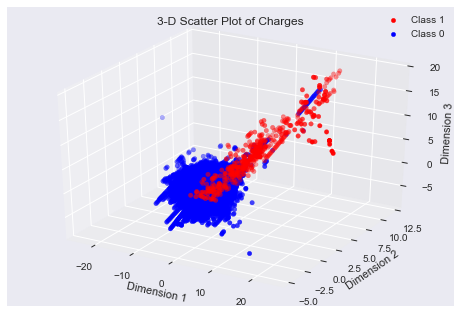

In [250]:
# Plot a 3-D scatter plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, y1, z1, c='r', label='Class 1')
ax.scatter(x0, y0, z0, c='b', label='Class 0')


plt.title('3-D Scatter Plot of Charges')
plt.legend()
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()

**Benford's Law**

The frequency of leading digits for many real-world data sets closely follow the distribution predicted by Benford's law. Benford's law predicts that the leading digit should have the probability log10(1 + 1/d) of occurring in the data set, where d is the leading digit. The frequency for each leading digit 1 - 9 for both fraudulent and non-fraudulent charges has been calculated and compared to the Benford's law distribution.(Wolfram MathWorld, n.d.)

In [19]:
# Create variables that have leading digit probabilities for both classes
# a is a list of the probabilities for fradulent charges
# b is a list of the probabilites for genuine charges
a = t.benford_f(df)
b = t.benford_g(df)

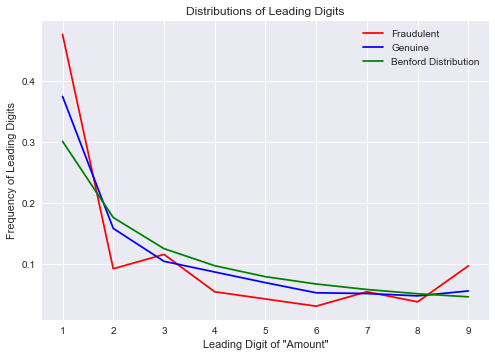

In [20]:
plt.plot([1,2,3,4,5,6,7,8,9],a, label = 'Fraudulent', c = 'r')
plt.plot([1,2,3,4,5,6,7,8,9],b, label = 'Genuine', c = 'b')
plt.plot([1,2,3,4,5,6,7,8,9],[.301,.176,.125,.097,.079,.067,.058,.051,.046],label = 'Benford Distribution', c = 'g')
plt.title('Distributions of Leading Digits')
plt.xlabel('Leading Digit of "Amount"')
plt.ylabel('Frequency of Leading Digits')
plt.legend()
plt.show()

**Key Insight**

Both fraudulent and genuine leading digits closely track the predictions made by Benford's law. Leading digits of genuine charges are closer to the predictions made by Benford's law than the leading digits of fraudulent charges. For fraudulent charges, the probability of a leading digit being 9 or 1 is noticeably different than the probability predicted by Benford's law. The probability of the first digit being a 9 for the fraudulent charges is ~ 9.6 percent versus ~5.5 percent for a non-fraudulent charge.

## Reflection

Many techniques were employed to find a signal in the vast number of feature variables. To find patterns in the dataset, the predictive features were selected with a Random Forest classifier. After training a few algorithms, the SVM algorithm generated the strongest results in the initial phase of model development and was chosen for further refinement. The process of refinement involved finding optimal hyper parameters with grid search and k-fold cross-validation. The parameters associated with the highest performing F1 score on the validation set were then chosen for the optimal Support Vector Machine. Hyper-parameter tuning did not improve the initial SVM model’s F1 score of 0.8723 although the SVM did exceed all benchmarks. 
There were several difficult aspects of this project, some of the difficulties include the imbalance in the data set and the lack of a clean delineation between fraudulent and genuine charges. The imbalance in the dataset contributed to the fact that there was much more information about the structure of genuine charges than fraudulent charges. Had there been more fraudulent charges, a better-defined pattern could have emerged and contributed to better model performance. The expectation was that I would build a model with a F1 score of >= 0.90 on the test set. The 0.8723 F1 score of the SVM is a respectable score for this problem and provides evidence that this type of problem can be solved with Support Vector Machine models.

## Improvement

There are several techniques that can possibly improve the results of the SVM model. Having more values for C and gamma in the parameter grid could have possibly returned better C and gamma values. This can be implemented if there is the significant time to allow for training, or there is very powerful computational power available for model training. Another model could have been optimized such as the decision tree classifier. It is possible the optimized decision tree classifier could have achieved better results than the optimized SVM. Additional models that could have been tested include random forests and deep neural networks. Several techniques exist that can alleviate the problems associated with unbalanced datasets. These techniques involve under sampling the most frequent class or oversampling the less frequent class which would lead to a more balanced dataset. There is also a technique called SMOTE that generates synthetic data points of the minority class to alleviate class imbalance (Microsoft, n.d.). If the final solution F1 = 0.8723 is used as a benchmark for future research, there is a very strong likelihood that it could be surpassed. The techniques I have mentioned such as more extensive model tuning and special sampling techniques for imbalanced datasets are areas to explore that could yield results that surpass the performance of the Support Vector Machine.

## References

CBINSIGHTS, Startups Using Machine Learning And Behavioral Biometrics To Fight Fraud. (2017, September 14). Retrieved October 25, 2017, from https://www.cbinsights.com/research/fraud-prevention-machine-learning-biometric-startups/

Dal Pozzolo Andrea, Caelen Olivier, Johnson R and Bontempi Gianluca . Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Economist, (2014) Skimming off the top, Retrieved October 24, 2017, from https://www.economist.com/news/finance-and-economics/21596547-why-america-has-such-high-rate-payment-card-fraud-skimming-top

Microsoft (n.d.). Retrieved October 25, 2017, from https://msdn.microsoft.com/en-us/library/azure/dn913076.aspx

Wolfram MathWorld, (n.d), Benford's Law. Retrieved October 25, 2017, from http://mathworld.wolfram.com/BenfordsLaw.html